In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Example dataset

In [94]:
lon_range = [-80,20]
lat_range = [20,80]

In [95]:
df = pd.read_csv("example_ensemble.csv", parse_dates=["time"])

In [96]:
starts = (
    df.sort_values("time")
      .groupby("traj_id", as_index=False)
      .first()
)

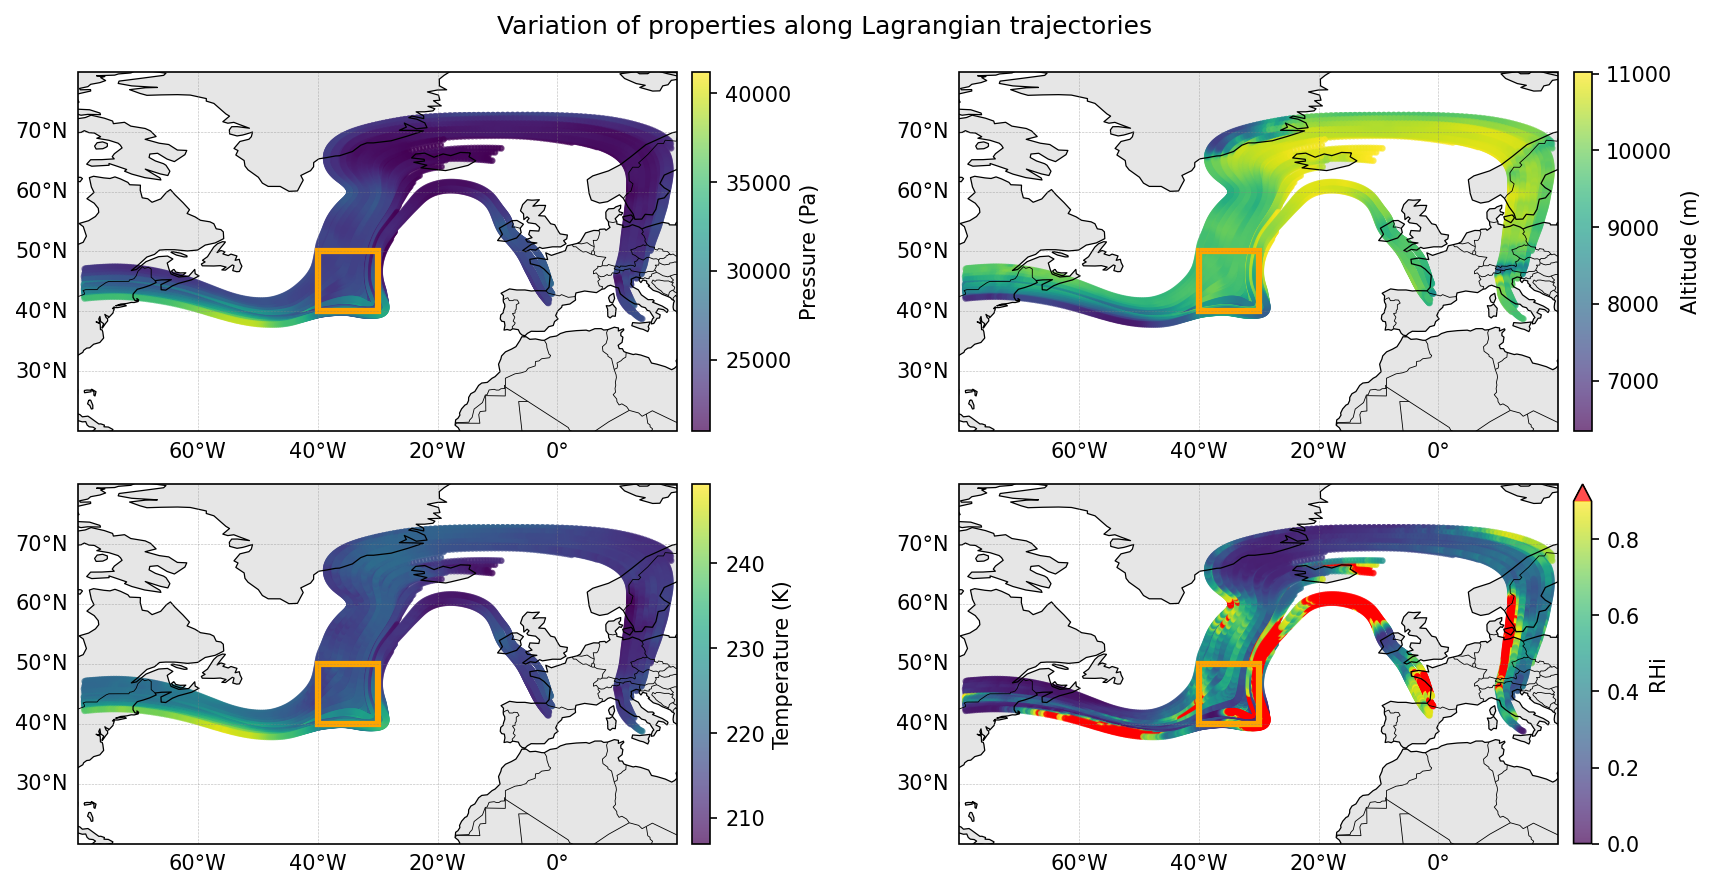

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(12,6),
                         subplot_kw={"projection": ccrs.PlateCarree()},
                         dpi=150)

fig.suptitle("Variation of properties along Lagrangian trajectories")

ax = axes[0,0]
sc = ax.scatter(df["lon"], df["lat"], c=df["p"], cmap="viridis",
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Pressure (Pa)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[0,1]
sc = ax.scatter(df["lon"], df["lat"], c=df["z"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Altitude (m)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[1,0]
sc = ax.scatter(df["lon"], df["lat"], c=df["t"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Temperature (K)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[1,1]

cmap = plt.get_cmap("viridis").copy()
cmap.set_over("red")
norm = colors.Normalize(vmin=0, vmax=0.9)

sc = ax.scatter(df["lon"], df["lat"], c=df["rhi"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree(),
                cmap=cmap, norm=norm)


cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285, extend="max")
cbar.set_label("RHi")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())


rect = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')
rect1 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')
rect2 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')

rect3 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')


axes[0,0].add_patch(rect)
axes[0,1].add_patch(rect1)
axes[1,0].add_patch(rect2)
axes[1,1].add_patch(rect3)

plt.tight_layout()
plt.show()

In [98]:
index = 12

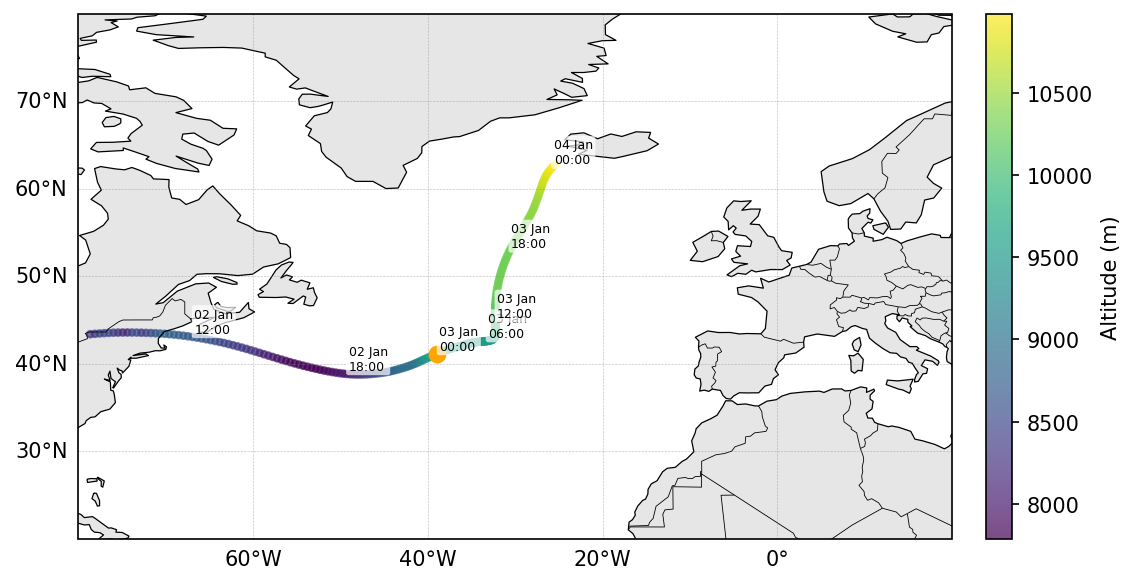

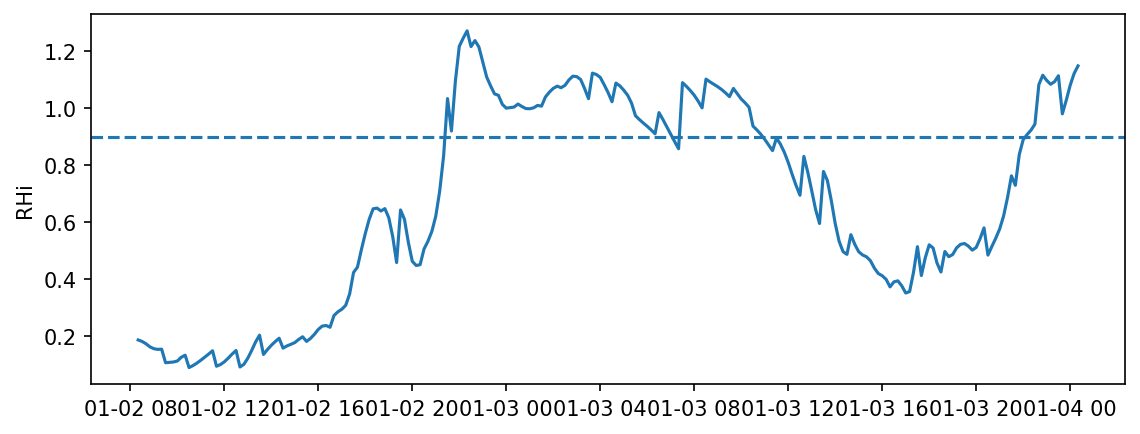

In [99]:
temp = df.loc[df['traj_id'].isin([index])]
rhis = temp.rhi
alts = temp.z
times = temp.time

fig, ax = plt.subplots(figsize=(12,4),
                         subplot_kw={"projection": ccrs.PlateCarree()},
                         dpi=150)

sc = ax.scatter(temp["lon"], temp["lat"], c=temp["z"], cmap="viridis",
                s=10, alpha=0.7, transform=ccrs.PlateCarree())
ax.scatter(starts["start_lon"][index-1], starts["start_lat"][index-1], marker="o", c="orange",
           s=50, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=4)

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Altitude (m)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())


three_hourly = temp[
    (temp["time"].dt.minute == 0) &
    (temp["time"].dt.hour % 6 == 0)
]

# Offset (degrees)
dx = 0.2
dy = 0.15

for _, row in three_hourly.iterrows():
    ax.text(
        row["lon"] + dx,
        row["lat"] + dy,
        row["time"].strftime("%d %b\n%H:%M"),
        fontsize=6,
        ha="left",
        va="bottom",
        zorder=4,
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.7,
            boxstyle="round,pad=0.2"
        )
    )

fig.tight_layout()
plt.show()


fig, ax = plt.subplots(1,1 ,figsize=(7.7,3),dpi=150)

ax.plot(times, rhis)
ax.set_ylabel("RHi")
ax.axhline(0.9, linestyle='--')

step = 100

fig.tight_layout()
plt.show()



# Working (one trajectory)

In [100]:
def signed_ascent_48h(traj: pd.DataFrame, meta: pd.DataFrame):
    """
    Negative => ascent, Positive => descent.
    """

    rhi_start = meta["rhi_start_time"].iloc[0]
    if pd.isna(rhi_start):
        ref_time = pd.to_datetime(meta["start_time"].iloc[0])
    else:
        ref_time = pd.to_datetime(rhi_start)

    window = traj[traj["time"] < ref_time].sort_values("time")

    if len(window) < 2:
        return np.nan

    t0 = ref_time - pd.Timedelta(hours=48)
    if window["time"].iloc[0] < t0:
        window = window[window["time"] >= t0]

    imax = window["p"].idxmax()
    imin = window["p"].idxmin()

    p_max, t_max = window.loc[imax, ["p", "time"]]
    p_min, t_min = window.loc[imin, ["p", "time"]]

    return (p_min - p_max) if (t_max < t_min) else (p_max - p_min)

def relative_hours(times, t0):
    return (times - t0) / np.timedelta64(1, "h")


In [101]:
df = pd.read_csv("ensemble.csv", parse_dates=["time"])
df_meta = pd.read_csv("ensemble_metadata.csv")

df["time"] = pd.to_datetime(df["time"])
df_meta["rhi_start_time"] = pd.to_datetime(df_meta["rhi_start_time"])

In [102]:
list_of_traj = [g for _, g in df.groupby("traj_id")]
index = 10
traj = list_of_traj[index-1]
meta = df_meta[df_meta["id"]==index]

start_time = meta["rhi_start_time"]

signed_ascent_48h(traj, meta)

np.float64(2881.0991447455344)

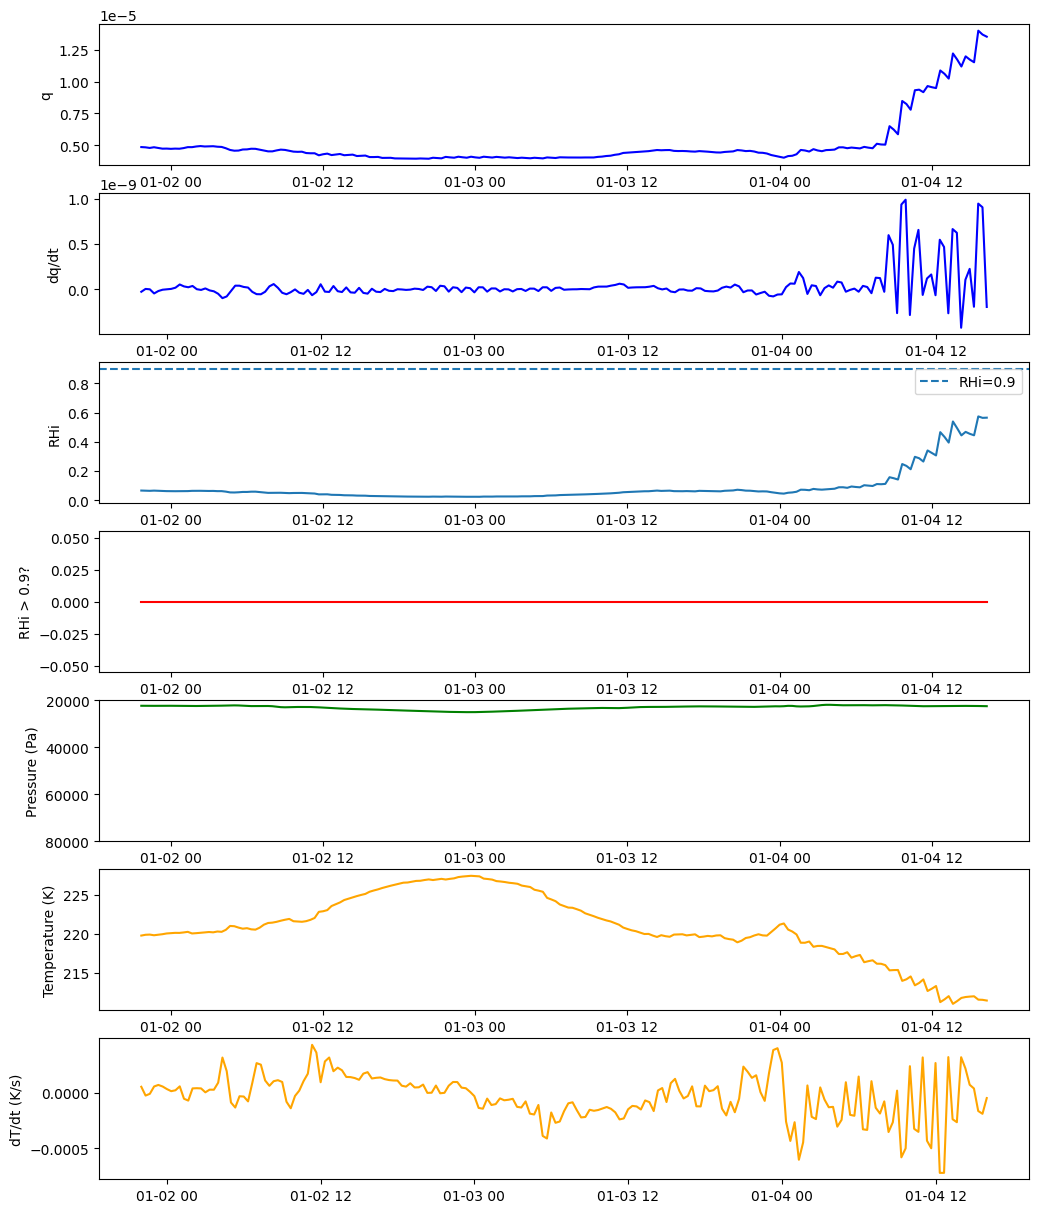

In [103]:
fig, ax = plt.subplots(7,1, figsize=(12,15))

ax[0].plot(traj["time"], traj["q"], color="b")
ax[0].axvline(start_time, linestyle='--', color='grey')
ax[0].set_ylabel("q")

ax[1].plot(traj["time"], traj["dqdt"], color="b")
ax[1].axvline(start_time, linestyle='--', color='grey')
ax[1].set_ylabel("dq/dt")

ax[2].plot(traj["time"], traj["rhi"])
ax[2].axhline(0.9, linestyle='--', label='RHi=0.9')
ax[2].axvline(start_time, linestyle='--', color='grey')
ax[2].set_ylabel("RHi")
ax[2].legend()

ax[3].plot(traj["time"], traj["mask"], color="red")
ax[3].axvline(start_time, linestyle='--', color='grey')
ax[3].set_ylabel("RHi > 0.9?")

ax[4].plot(traj["time"], traj["p"], color="green")
ax[4].axvline(start_time, linestyle='--', color='grey')
ax[4].set_ylabel("Pressure (Pa)")
ax[4].set_ylim([20000,80000])
ax[4].invert_yaxis()

ax[5].plot(traj["time"], traj["t"], color="orange")
ax[5].axvline(start_time, linestyle='--', color='grey')
ax[5].set_ylabel("Temperature (K)")

ax[6].plot(traj["time"], traj["dTdt"], color="orange")
ax[6].axvline(start_time, linestyle='--', color='grey')
ax[6].set_ylabel("dT/dt (K/s)")

plt.show()

# Working (metadata)

In [112]:
df_meta["dp48"] = df_meta["id"].apply(
    lambda i: signed_ascent_48h(
        list_of_traj[i - 1],
        df_meta[df_meta["id"] == i]
    )
)

In [167]:
non_issrs    = df_meta.loc[~df_meta["start_rhi"]]
issrs        = df_meta.loc[df_meta["start_rhi"]]
issrs_subset = issrs.loc[issrs["rhi_duration_hours"] > 1]

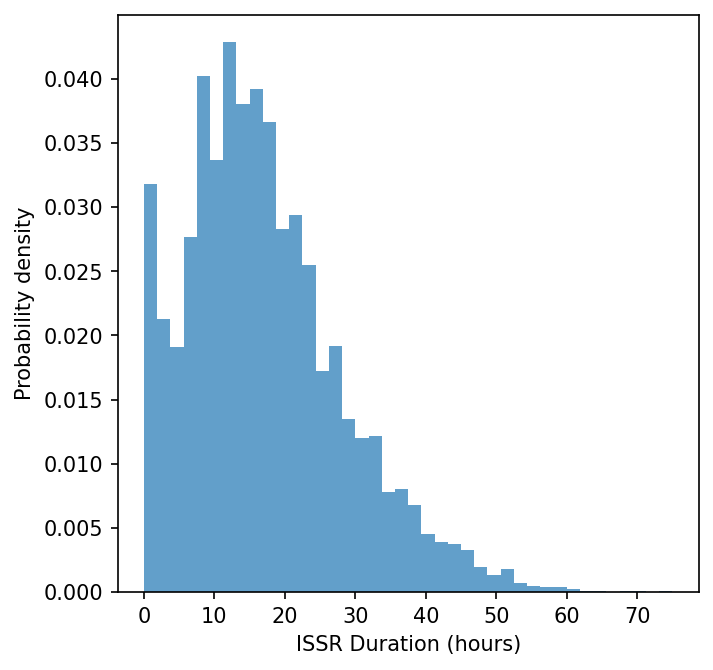

In [168]:
fig, axs = plt.subplots(1,1, figsize=(5,5), dpi=150)
axs.hist(issrs["rhi_duration_hours"],  bins=40, alpha=0.7, density=True)
axs.set_xlabel("ISSR Duration (hours)")
axs.set_ylabel("Probability density")
plt.show()

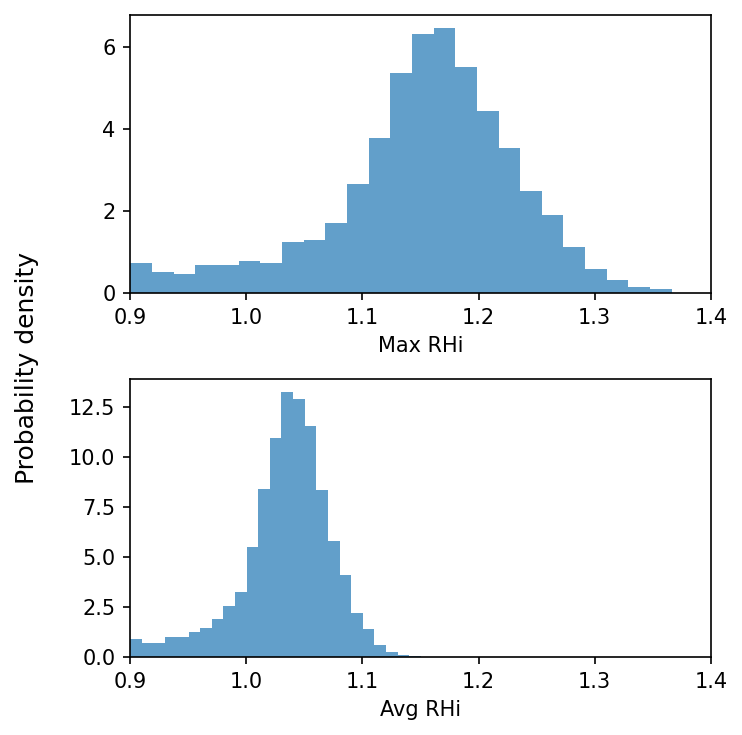

In [169]:
fig, axs = plt.subplots(2,1, figsize=(5,5),dpi=150)
axs[0].hist(issrs["max_rhi_issr"], bins=25, alpha=0.7, density=True)
axs[1].hist(issrs["avg_rhi_issr"], bins=25, alpha=0.7, density=True)

axs[0].set_xlabel("Max RHi")
axs[1].set_xlabel("Avg RHi")

axs[0].set_xlim([0.9,1.4])
axs[1].set_xlim([0.9,1.4])

fig.supylabel("Probability density")
fig.tight_layout()

plt.show()

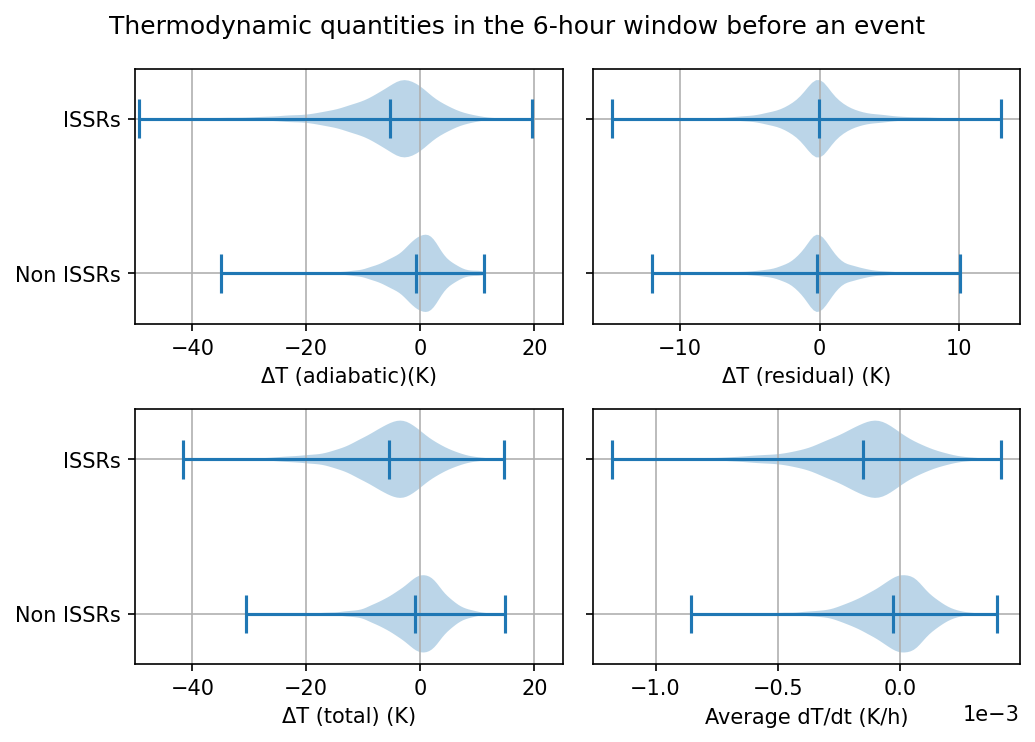

In [170]:
fig, axs = plt.subplots(2,2, figsize=(7,5), dpi=150)

axs[0,0].violinplot([non_issrs["delta_T_adiab_pre_event"],issrs["delta_T_adiab_pre_event"]], vert=False, showmeans=True)
axs[0,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[0,0].set_xlabel("ΔT (adiabatic)(K)")
axs[0,0].grid()
axs[0,0].set_xlim([-50,25])

axs[0,1].violinplot([non_issrs["delta_T_resid_pre_event"],issrs["delta_T_resid_pre_event"]], vert=False, showmeans=True)
axs[0,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[0,1].set_xlabel("ΔT (residual) (K)")
axs[0,1].grid()

axs[1,0].violinplot([non_issrs["delta_T_total_pre_event"],issrs["delta_T_total_pre_event"]], vert=False, showmeans=True)
axs[1,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,0].set_xlabel("ΔT (total) (K)")
axs[1,0].grid()
axs[1,0].set_xlim([-50,25])

axs[1,1].violinplot([non_issrs["avg_dTdt_pre_event"].dropna(),issrs["avg_dTdt_pre_event"].dropna()], vert=False, showmeans=True)
axs[1,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[1,1].set_xlabel("Average dT/dt (K/h)")
axs[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs[1,1].grid()

fig.suptitle("Thermodynamic quantities in the 6-hour window before an event")

plt.tight_layout()
plt.show()

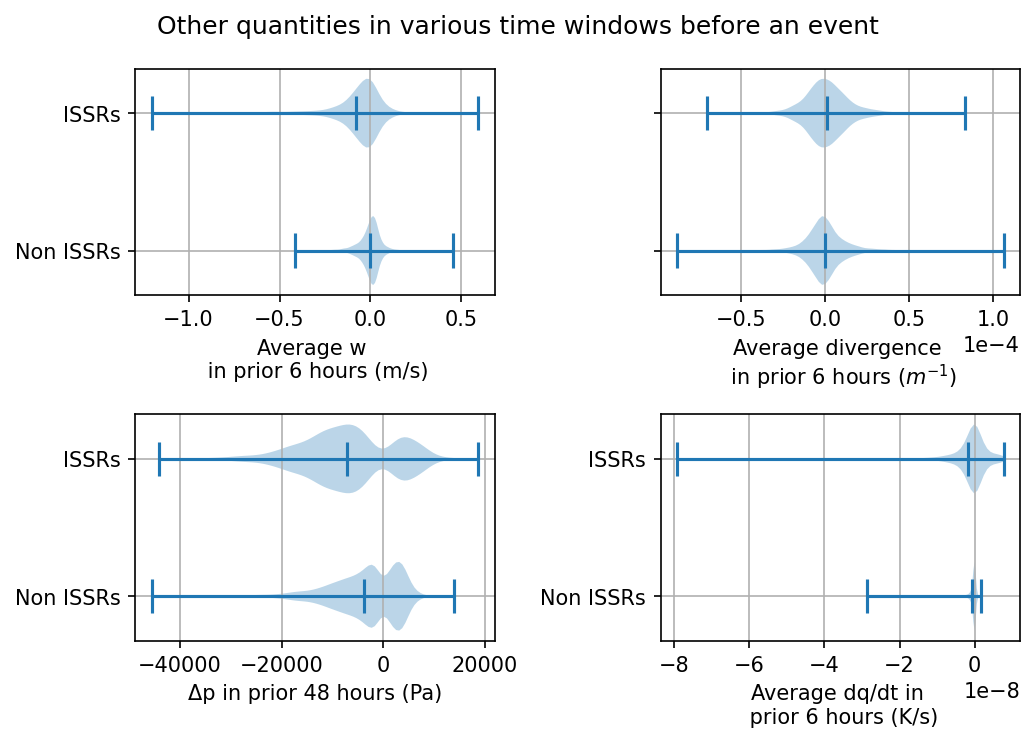

In [171]:
fig, axs = plt.subplots(2,2, figsize=(7,5), dpi=150)

axs[0,0].violinplot([non_issrs["avg_w_pre_event"],issrs["avg_w_pre_event"].dropna()], vert=False, showmeans=True)
axs[0,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[0,0].set_xlabel("Average w \n in prior 6 hours (m/s)")
axs[0,0].grid()

axs[0,1].violinplot([non_issrs["avg_d_pre_event"],issrs["avg_d_pre_event"].dropna()], vert=False, showmeans=True)
axs[0,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[0,1].set_xlabel("Average divergence \n in prior 6 hours ($m^{-1}$)")
axs[0,1].ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs[0,1].grid()

axs[1,0].violinplot([non_issrs["dp48"].dropna(),issrs["dp48"].dropna()], vert=False, showmeans=True)
axs[1,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,0].set_xlabel("Δp in prior 48 hours (Pa)")
axs[1,0].grid()

axs[1,1].violinplot([non_issrs["avg_dqdt_pre_event"].dropna(),issrs["avg_dqdt_pre_event"].dropna()], vert=False, showmeans=True)
axs[1,1].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,1].set_xlabel("Average dq/dt in \n prior 6 hours (K/s)")
axs[1,1].grid()

fig.suptitle("Other quantities in various time windows before an event")

plt.tight_layout()
plt.show()

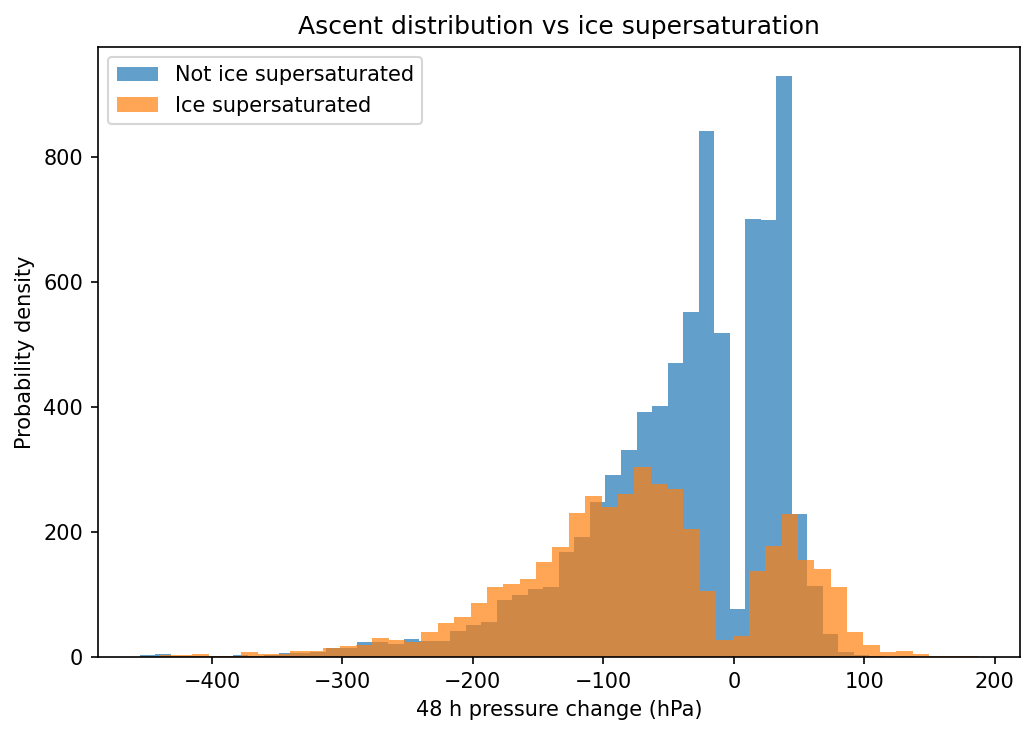

In [181]:
df_plot = df_meta.dropna(subset=["dp48"])

dp_iss  = df_plot.loc[df_plot["start_rhi"],  "dp48"] / 100.0
dp_no   = df_plot.loc[~df_plot["start_rhi"], "dp48"] / 100.0

plt.figure(figsize=(7,5),dpi=150)
plt.hist(dp_no,  bins=50, alpha=0.7, label="Not ice supersaturated")
plt.hist(dp_iss, bins=50, alpha=0.7, label="Ice supersaturated")

plt.xlabel("48 h pressure change (hPa)")
plt.ylabel("Probability density")
plt.title("Ascent distribution vs ice supersaturation")
plt.legend()

plt.tight_layout()
plt.show()


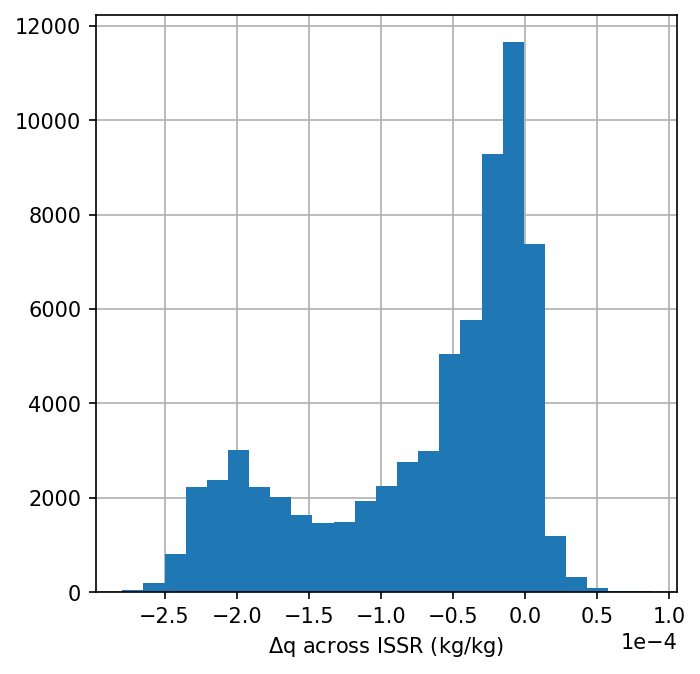

In [179]:
fig, axs = plt.subplots(1,1, figsize=(5,5),dpi=150)
axs.hist(issrs["delta_q_issr"], bins=25, alpha=1, density=True, zorder=2)
axs.ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs.set_xlabel("$\Delta$q across ISSR (kg/kg)")
axs.grid()

plt.show()

# Clusterin'

## Step 1